In [4]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import pyaudio
import sounddevice as sd

In [5]:
micData = np.loadtxt('MIC_1_RIGHT.dat')
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)

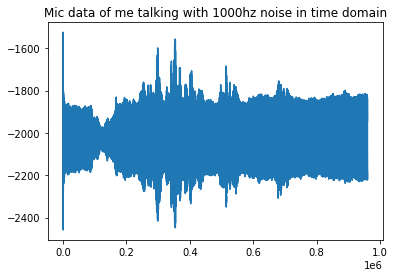

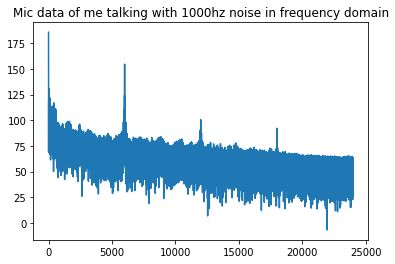

In [6]:
plt.figure()
plt.title("Mic data of me talking with 1000hz noise in time domain")
plt.plot(micData)

plt.figure()
plt.title("Mic data of me talking with 1000hz noise in frequency domain")
plt.plot(np.linspace(0,24000,len(np.fft.rfft(micData))),sig2db(np.abs(np.fft.rfft(micData))))

In [7]:
micFiltered = np.loadtxt('obj_dir/51_taps.dat')

In [8]:
print(micFiltered)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.49704385e+11
 5.49704416e+11 5.49704000e+05]


In [9]:
def bit_not(n, numbits=8):
    return (1 << numbits) - 1 - n

def negatives(arr):
    out = np.array([])
    for n in range(len(arr)):
        if (arr[n] > 274877906944):
            #print(-(bit_not(arr[n],39)+1))
            arr[n] = -bit_not(arr[n],39)+1

In [10]:
ints = np.int64(micFiltered)
negatives(ints)


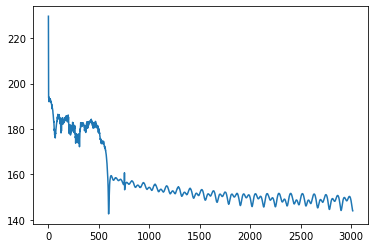

In [11]:

plt.plot(sig2db(abs(np.fft.rfft(ints))))


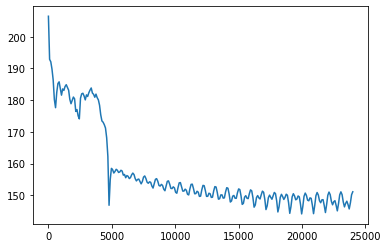

In [12]:
plt.plot(np.linspace(0,24000,len(np.fft.rfft(ints,512))),sig2db(np.abs(np.fft.rfft(ints,512))))

In [13]:
taps = np.array([
  -22,
  -367,
  -483,
  -696,
  -854,
  -908,
  -821,
  -581,
  -222,
  185,
  542,
  747,
  726,
  458,
  -11,
  -565,
  -1042,
  -1267,
  -1097,
  -463,
  606,
  1977,
  3435,
  4727,
  5615,
  5931,
  5615,
  4727,
  3435,
  1977,
  606,
  -463,
  -1097,
  -1267,
  -1042,
  -565,
  -11,
  458,
  726,
  747,
  542,
  185,
  -222,
  -581,
  -821,
  -908,
  -854,
  -696,
  -483,
  -367,
  -22])

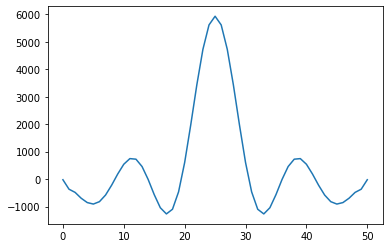

In [14]:
plt.plot(taps)

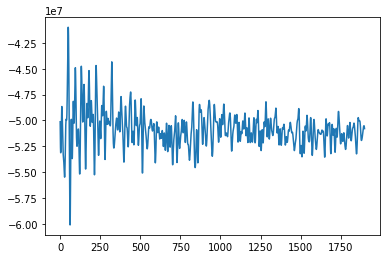

In [15]:
plt.plot(np.convolve(taps,micData)[100:2000])

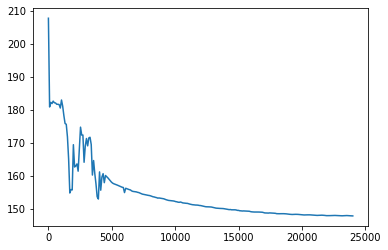

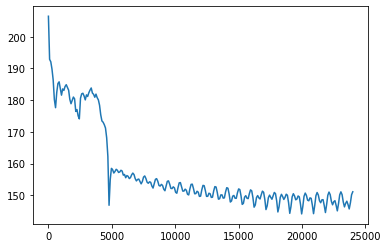

In [16]:
filtered = np.convolve(taps,micData)
plt.figure()
plt.plot(np.linspace(0,24000,len(np.fft.rfft(filtered,512))),sig2db(np.abs(np.fft.rfft(filtered,512))))
plt.figure()
plt.plot(np.linspace(0,24000,len(np.fft.rfft(ints,512))),sig2db(abs(np.fft.rfft(ints,512))))

In [17]:
print(ints)

[        0         0         0 ... -51429202 -51397402    549704]


In [23]:
from IPython.display import Audio

def sound( x, rate=8000, label=''):
    from IPython.display import display, Audio, HTML
    if label is '':
        display( Audio( x, rate=rate))
    else:
        display( HTML( 
        '<style> table, th, td {border: 0px; }</style> <table><tr><td>' + label + 
        '</td><td>' + Audio( x, rate=rate)._reprhtml()[3:] + '</td></tr></table>'
        ))
        
sound(micFiltered, rate=48000)
len(micFiltered)

6036